1Q) You are browsing your favorite internet auction site and thinking about a little on-line arbitrage. You have $100 to invest and with a little clever searching and some elbow grease you believe you can turn a profit on these items. Write a python script to determine the optimal way to spend your $100 and maximize your profit. (You are only constrained in your purchasing power, the repair cost will only reduce your profits)

+-----------------------------------------------+-------+---------------+------------------+
| Item											| Cost	| Repair Cost	| Estimated Resale |
+-----------------------------------------------+-------+---------------+------------------+
| Gameboay a 5 games							| 10	| 2				| 30			   |
| 10 Jazz LPs									| 10	| 0				| 50			   |
| Collected Lectures of Your Beloved Professor	| 25	| 0				| 10			   |
| 32" Monitor									| 75	| 10			| 150			   |
| Broken OneWheel								| 125	| 125			| 500			   |
| Scooter										| 50	| 25			| 100			   |
| Box of random trading cards					| 30	| 0				| 50			   |
| Box of yo-yos									| 15	| 5				| 35			   |
+-----------------------------------------------+-------+---------------+------------------+



In [70]:
def maximize_profit(items, budget):
    n = len(items)
    dp = [[0] * (budget + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(budget + 1):
            cost, repair_cost, resale_value = items[i - 1][1:]  # Fix here, skip the first element (item name)
            
            if cost <= j:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - cost] + resale_value - repair_cost)
            else:
                dp[i][j] = dp[i - 1][j]

    selected_items = []
    i, j = n, budget
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_items.append(items[i - 1])
            j -= items[i - 1][1]  # Fix here, use the cost from the tuple
        i -= 1

    return dp[n][budget], selected_items

# Define the items with their cost, repair cost, and estimated resale value
items = [
    ("Gameboy with 5 games", 10, 2, 30),
    ("10 Jazz LPs", 10, 0, 50),
    ("Collected Lectures", 25, 0, 10),
    ("32-inch Monitor", 75, 10, 150),
    ("Broken OneWheel", 125, 125, 500),
    ("Scooter", 50, 25, 100),
    ("Box of trading cards", 30, 0, 50),
    ("Box of yo-yos", 15, 5, 35),
]

# Set the budget
budget = 100

# Find the optimal way to spend the budget
max_profit, selected_items = maximize_profit(items, budget)

# Display the results
print("Maximum Profit:", max_profit)
print("Selected Items:")
for item in selected_items:
    print("- {} (Cost: {}, Repair Cost: {}, Resale Value: {})".format(*item))

Maximum Profit: 220
Selected Items:
- Box of yo-yos (Cost: 15, Repair Cost: 5, Resale Value: 35)
- 32-inch Monitor (Cost: 75, Repair Cost: 10, Resale Value: 150)
- 10 Jazz LPs (Cost: 10, Repair Cost: 0, Resale Value: 50)


In [71]:
## GRAPH CLASS

class Node(object):
    def __init__(self, name):
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return f'{self.name}'
    
class Edge(object):
    def __init__(self, src, dest):
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return f'{self.src.getName()} -> {self.dest.getName()}'
    
class WeightedEdge(Edge):
    def __init__(self, src, dest, weight = 1.0):
        self.src = src
        self.dest = dest
        self.weight = weight
    def getWeight(self):
        return self.weight
    def __str__(self):
        return f'{self.src.getName()} ->({str(self.weight)}) {self.dest.getName()}'

class Digraph(object):
    #nodes is a list of the nodes in the graph
    #edges is a dict mapping each node to a list of its children
    def __init__(self):
        self.nodes = []
        self.edges = {}
    
    def addNode(self, node):
        if node in self.nodes:
            raise ValueError('Duplicate node')
        else:
            self.nodes.append(node)
            self.edges[node] = []
    
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        
        if not(src in self.nodes and dest in self.nodes):
            raise ValueError(f'Node not in graph')
        
        if dest not in self.edges[src]:
            self.edges[src].append(dest)
        
    def childrenOf(self, node):
        return self.edges[node]
    
    def hasNode(self, node):
        return node in self.nodes
    
    def __str__(self):
        result = ''
        for src in self.nodes:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                + dest.getName() + '\n'
        return result[:-1]

2Q) Create a class called Airports to contain information about each airport in the flight schedule. Right now that class will only contain the airport code. In practical application much more information would be needed - like where the airport is located?

In [72]:
class Airport(Node):

    def __init__(self, airport):

        # Initialize the `Node` class with the airport name
        Node.__init__(self, airport)

    def getName(self):
        return self.name


3Q) Create a class called Flight to encapsulate the details of each flight. Convert the schedule departure and arrival times into time objects using the 'datetime' package. (SCHEDULED_TIME represents flight duration in minutes.) Make sure your __str__() method prints useful information such as the fight number; origin and destination airports with scheduled times. (Note the times are also on the 24 hour clock.)

In [73]:
class Flight(WeightedEdge):
    def __init__(self, src, dest, flight_no, scheduled_time, distance, scheduled_departure, scheduled_arrival):
        
         # Initialize the `WeightedEdge` class with the source and destination airports and the distance
        WeightedEdge.__init__(self, src, dest, distance)

        # Store additional flight information
        self.flight_no = flight_no
        self.scheduled_time = scheduled_time
        self.distance = distance
        self.scheduled_departure = scheduled_departure
        self.scheduled_arrival = scheduled_arrival
    
    def __str__(self):
        return f'Flight {self.getFlightNo()} {self.src} -> {self.dest}: {self.getScheduledTime()}'
    
    def getFlightNo(self):
        return self.flight_no

    def getScheduledTime(self):
        return self.scheduled_time
    
    def getDistance(self):
        return self.distance
    
    def getScheduledDeparture(self):
        return self.scheduled_departure.strptime('%H:%M')
        
    def getScheduledArrival(self):
        return self.scheduled_arrival.strptime('%H:%M')

    def getArrival(self):
        return self.scheduled_arrival
    
    def getDeparture(self):
        return self.scheduled_departure   
    

4Q) Create a directed graph class that uses Airports as nodes and Flights as edges. (This is not a graphic - remember our reading.) You may need to extend your original classes. If so, do so as part of step 4. Include a load_from_file() method that accepts a CSV in the form of our DS_Flights.csv file.

In [74]:
import pandas as pd

class AirNetwork(Digraph):
    def __init__(self):
        Digraph.__init__(self)
        self.flights = {}
        return
    
    def findAirport(self, airport):
        if isinstance(airport, Airport):
            airport = airport.name
        
        nodes = [node for node in self.nodes if node.name == airport]
        return None if not nodes else nodes[0]
    
    def addAirport(self, airport):
        Digraph.addNode(self, airport)
        self.flights[airport] = []
        return
    
    def addFlight(self, flight):
        Digraph.addEdge(self, flight)
        airport = flight.getSource()
        if not self.findFlight(airport, flight):
            self.flights[airport].append(flight)
        return
    
    def findFlights(self, source):
        airport = self.findAirport(source)
        if airport:
            return self.flights[airport]
        else:
            raise ValueError(f'Airport {source} not in the flight network.')
        return
    
    def findFlight(self, airport, flightNo):
        flights = [flight for flight in self.flights[airport] if flight.flight_no == flightNo]
        return None if not flights else flights[0]
    
    def loadFromFile(self, filepath):
        dsFlights = pd.read_csv(filepath)
        airports = []
        src = list(dsFlights['ORIGIN_AIRPORT'].unique())
        des = list(dsFlights['DESTINATION_AIRPORT'].unique())

        airports = list(set(src+des))
        
        # Add airports (nodes)
        for airport in airports:
            self.addAirport(Airport(airport))
        
        # Add flights (edges)
        for index, row in dsFlights.iterrows():
            src = self.findAirport(row['ORIGIN_AIRPORT'])
            dest = self.findAirport(row['DESTINATION_AIRPORT'])
            
            # src, dest, flight_no, scheduled_time, distance, scheduled_departure, scheduled_arrival
            self.addFlight(Flight(src, dest, 
                             row['FLIGHT_NUMBER'], row['SCHEDULED_TIME'], row['DISTANCE'],
                             row['SCHEDULED_DEPARTURE'], row['SCHEDULED_ARRIVAL']))
        return
    
    def __str__(self):
        result = ''
        for airport in self.flights:
            result += f'Flights from {airport}' + '\n'
            for flight in self.flights[airport]:
                result = result + str(flight) + '\n'
            result += ('-'*50) + '\n'
        return result[:-1]
    
import pandas as pd

filename = "/Users/tbs/Downloads/DS_Flights (1).csv"

# Creating Advanced Directed Graph which inherits Digraph
network = AirNetwork()

network.loadFromFile(filename)

print(network)


Flights from LAX
Flight 369 LAX -> ATL: 252
Flight 1325 LAX -> MSY: 216
Flight 1506 LAX -> DTW: 267
Flight 2427 LAX -> LAS: 74
--------------------------------------------------
Flights from DFW
Flight 1890 DFW -> ATL: 124
--------------------------------------------------
Flights from PDX
--------------------------------------------------
Flights from DTW
--------------------------------------------------
Flights from MCI
--------------------------------------------------
Flights from BWI
--------------------------------------------------
Flights from DEN
Flight 1075 DEN -> JFK: 219
Flight 1610 DEN -> DTW: 184
Flight 2442 DEN -> ATL: 169
--------------------------------------------------
Flights from BNA
--------------------------------------------------
Flights from MDW
--------------------------------------------------
Flights from IAD
--------------------------------------------------
Flights from SFO
--------------------------------------------------
Flights from JFK
Flight 436 JF

5Q) Test you directed graph by loading DS_Flights and showing all flights from Denver (DEN). There should be 4 - you might want to test other airports as well, For example, LAX and Boston also should have 4 flights. Our own IND has only 1 flight.

In [75]:
# Function to print flights departing from a specific airport
def printFlights(airport, flights):
    print(f'Airport {airport} has below flights')
    for flight in flights:
        print(flight)
    return

# Printing flights from 'DEN'
printFlights('DEN', network.findFlights('DEN'))
print()

# Printing flights from 'LAX'
printFlights('LAX', network.findFlights('LAX'))
print()

# Printing flights from 'BOS'
printFlights('BOS', network.findFlights('BOS'))
print()

# Printing flights from 'IND'
printFlights('IND', network.findFlights('IND'))


Airport DEN has below flights
Flight 1075 DEN -> JFK: 219
Flight 1610 DEN -> DTW: 184
Flight 2442 DEN -> ATL: 169

Airport LAX has below flights
Flight 369 LAX -> ATL: 252
Flight 1325 LAX -> MSY: 216
Flight 1506 LAX -> DTW: 267
Flight 2427 LAX -> LAS: 74

Airport BOS has below flights
Flight 583 BOS -> DTW: 144
Flight 2050 BOS -> MCO: 204
Flight 2282 BOS -> ATL: 191

Airport IND has below flights
Flight 1759 IND -> ATL: 106


6Q) Write a search function to find all routes between two airports (Remember we don't want to fly in circles!)

In [76]:
# Function to convert the path into a printable string
def printPath(path):
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

# Depth-First Search (DFS) algorithm to find the shortest path between two nodes
def DFS(graph, start, end, path, shortest, toPrint=False):
    path = path + [start]  # Append the current node to the path
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:  # If the destination node is reached
        return path
    for node in graph.childrenOf(start):
        if node not in path:  # Avoid cycles
            if shortest is None or len(path) < len(shortest):
                # Recursive call to explore the next node
                newPath = DFS(graph, node, end, path, shortest, toPrint)
                if newPath is not None:
                    shortest = newPath
    return shortest

# Breadth-First Search (BFS) algorithm to find the shortest path between two nodes
def BFS(graph, start, end, toPrint=False):
    initPath = [start]
    pathQueue = [initPath]
    if toPrint:
        print('Current BFS path:', printPath(initPath))
    while len(pathQueue) != 0:
        # Get and remove the oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:  # If the destination node is reached
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]  # Append the next node to the path
                pathQueue.append(newPath)
    return None

# Function to find the shortest path between two nodes using the specified searcher (DFS/BFS)
def shortestPath(graph, start, end, searcher, toPrint=False):
    return DFS(graph, start, end, [], None, toPrint)


In [77]:
# Function to find the shortest path between two airports based on the specified search method ('BFS' or 'DFS')
def findShortestPath(graph, src, des, search):
    path = ''  # Initialize the path variable

    # Check the specified search method ('BFS' or 'DFS') and find the shortest path accordingly
    if search == 'BFS':
        path = BFS(graph, graph.findAirport(src), graph.findAirport(des), False)  # Using BFS
    else:
        path = DFS(graph, graph.findAirport(src), graph.findAirport(des), [], None, False)  # Using DFS

    # Print the shortest path according to the chosen search method
    print(f'Shortest path according to {search}:', printPath(path))

# Example usage: Finding the shortest path between 'LAX' and 'SFO' using DFS
findShortestPath(network, 'LAX', 'SFO', 'DFS')


Shortest path according to DFS: LAX->ATL->JFK->SFO


7Q) Refine your search function to avoid overnight stays. For example, the flight from IND to ATL lands at 10:06. If the search includes a flight from IND the next flight in the path can not leave before 10:06. (Note: the best way to do this might be to add a function to the Flights object similar to childron_of() that also includes a parameter designating the earliest time for the next flight.)

In [78]:
# Function to print the trip details
def printTrip(trip, src, des):
    print(f'Shortest route from {src} to {des}')
    for flight in trip:
        print(flight)
    return

# Function to check if a flight is part of the trip
def isInTrip(trip, flight):
    for leg in trip:
        if leg.getSource() == flight.getDestination():
            return True
    return False

# Depth-First Search (DFS) recursive function to find the shortest path between airports
def DFS(graph, start, end, flight, trip, path):
    if flight is None:
        prevArrival = 0
    else:
        trip = trip + [flight]
        if start == end:
            return trip
        prevArrival = flight.getArrival()
    
    for flight in graph.findFlights(start):
        if not isInTrip(trip, flight) and flight.getDeparture() > prevArrival \
        and (path is None or len(trip) < len(path)):
            newPath = DFS(graph, flight.getDestination(), end, flight, trip, path)
            if newPath is not None:
                path = newPath
    return path

# Function to find the shortest path between two airports in the network
def findShortestPath(graph, src, des):
    trip = DFS(graph, graph.findAirport(src), graph.findAirport(des), None, [], None)
    if trip == [] or trip is None:
        print("Trips not found")
    else:
        printTrip(trip, src, des)
    return

# Example usage: Find the shortest path from 'LAX' to 'DEN'
findShortestPath(network, 'LAX', 'DEN')


Shortest route from LAX to DEN
Flight 369 LAX -> ATL: 252
Flight 735 ATL -> DEN: 211


8Q) Describe in a cell of your notebook how you might apply dynamic programming to the system.

Dynamic programming is a versatile technique that can be effectively applied to various aspects of flight scheduling to optimize operations and enhance efficiency. Here are a few examples of how dynamic programming can be utilized to address critical challenges in flight scheduling:

1. Optimal Flight Routes

Dynamic programming can be employed to determine the most efficient travel routes for passengers, considering factors such as minimizing travel time or reducing the number of layovers. By leveraging dynamic programming's ability to store intermediate results and address overlapping subproblems, optimal routes can be efficiently calculated for complex travel scenarios involving shared layovers.

2. Optimal Crew Scheduling

Efficient crew scheduling is crucial for minimizing operational costs and maximizing crew productivity. Dynamic programming can be utilized to develop optimal crew schedules that adhere to legal working hours, consider crew preferences, and ensure efficient crew utilization across flight segments.

3. Flight Delay Prediction

Predictive analytics can be enhanced using dynamic programming to anticipate potential flight delays. By incorporating historical delay data, real-time weather updates, and other relevant factors, dynamic programming models can estimate the likelihood and duration of flight delays, allowing airlines to proactively manage schedules and minimize the impact of disruptions.

4. Revenue Management

Revenue maximization is a key objective for airlines, and dynamic programming can play a significant role in optimizing pricing and seat allocation strategies. Dynamic pricing models that incorporate real-time demand data, competitor pricing, and historical booking patterns can be developed using dynamic programming. These models can dynamically adjust ticket prices to maximize revenue while considering market conditions.

5. Aircraft Maintenance Scheduling

Effective maintenance scheduling is essential for maintaining aircraft operational readiness and minimizing downtime. Dynamic programming can be employed to optimize maintenance schedules, taking into account factors such as aircraft utilization, maintenance requirements, and operational constraints. This approach can help airlines balance maintenance activities with operational demands to ensure optimal aircraft performance.

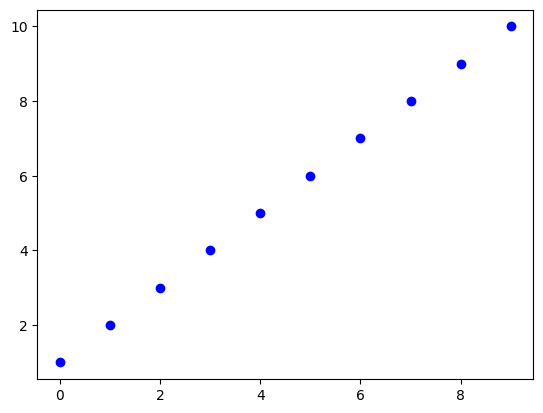

In [1]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, "bo")
plt.show()
